In [1]:
from math import sin, sqrt, exp, cos, log10
import matplotlib.pyplot as plt
from rk6 import rk_fixed_step

In [2]:
# we create a bunch of pts in the middle of a and b
# we also return their spacing 'xs' in [0, 2] so that we can plot them
def create_pts(a, b):
    num_points = 100
    curr = a
    res = [curr]
    h = (b - a) / num_points
    x = 0
    delta_x = 1/num_points
    xs = [x]
    for i in range(1, num_points + 1):
        curr += h
        res.append(curr)
        x += delta_x
        xs.append(x)
    return res, xs

def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [6]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    (res, sol, first_deriv, derivs) = rk_fixed_step(model, t_span, y0[0], 10000)
    # print("derivs", derivs)

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    # xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    # for this_x in xs:
    #     plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend()
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    plt.figure()
    plt.plot(t_eval, error)
    plt.title("ERROR in solution")
    plt.show()

    # ====================================== figure of scaled defect
    # defect graphs
    # we only pick 10 of the derivs
    pick_every = (len(derivs) // 10) + 1
    # print("pick every", pick_every)
    plotted_derivs = []
    for i in range(0, len(derivs), pick_every):
        plotted_derivs.append(
            derivs[i]
        )


    plt.figure()
    for (x_i_minus_1, x_i_plus_1, hb) in plotted_derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i_minus_1, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append(hb_prime_eval - f_eval)
        maximum_defect = max(defects)
        minimum_defect = min(defects)
        plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("step scaled between 0 and 2")
    plt.ylabel('defect')
    # plt.legend()
    plt.show()
    # ====================================== end figure of scaled defect

    # ====================================== figure of global defect 
    computed_derivs = [first_deriv(x) for x in t_eval]
    # print("computed derivs", computed_derivs)

    actual_f_evals = [model(x, solution([x])[0] )[0] for x in t_eval]
    # print("actual f_evals", actual_f_evals)

    global_defects = [( abs((computed_deriv-actual_f_eval)) ) for (computed_deriv, actual_f_eval) in zip(computed_derivs, actual_f_evals)]
    # print("global defects", global_defects)
    # global_defects = [ log10(x) for x in global_defects ]
    plt.figure()
    plt.plot(t_eval, global_defects, label=f"global defect")
    plt.title("plot of defects")
    plt.show()
    # ====================================== end of figure of global defect

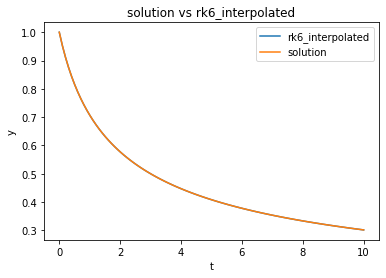

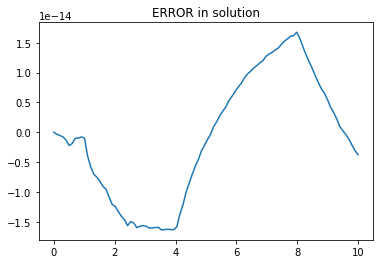

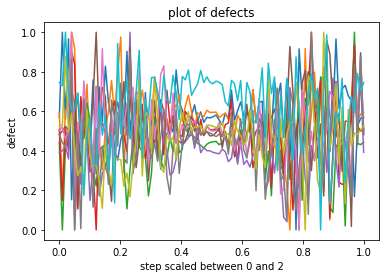

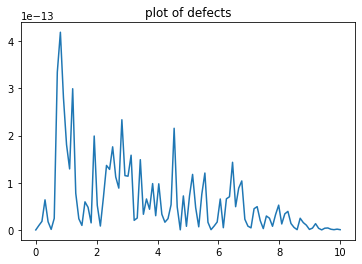

In [7]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

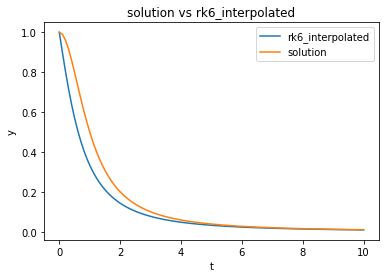

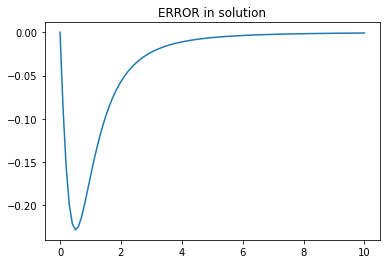

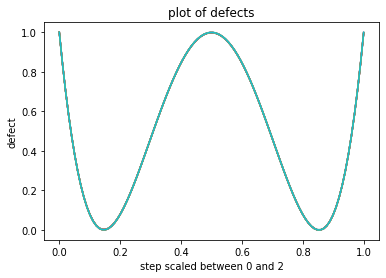

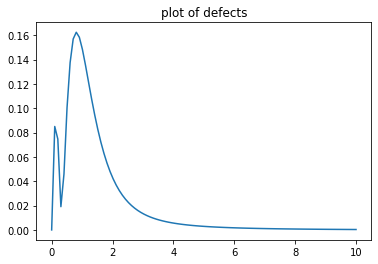

In [8]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

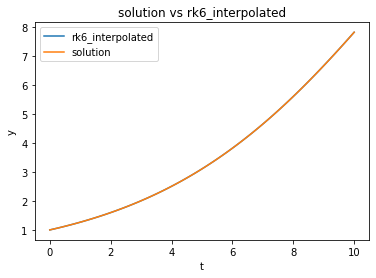

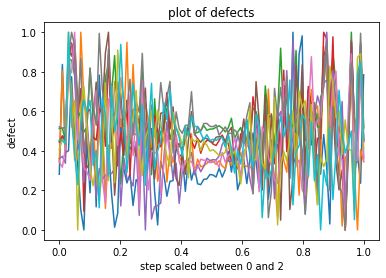

global defects [0.0, 9.992007221626409e-15, 6.772360450213455e-15, 2.531308496145357e-14, 1.9206858326015208e-14, 1.6653345369377348e-14, 1.815214645262131e-14, 1.5376588891058418e-14, 1.0547118733938987e-14, 1.8318679906315083e-15, 6.006306563222097e-14, 8.93729534823251e-14, 4.8627768478581856e-14, 4.0745185003743245e-14, 2.7755575615628914e-14, 1.3322676295501878e-14, 2.4646951146678475e-14, 1.9872992140790302e-14, 5.495603971894525e-15, 5.051514762044462e-15, 1.3877787807814457e-15, 1.3156142841808105e-14, 3.4861002973229915e-14, 4.551914400963142e-15, 3.602673714908633e-14, 3.502753642692369e-14, 1.3988810110276972e-14, 8.215650382226158e-15, 1.8041124150158794e-14, 5.9396931817445875e-15, 7.494005416219807e-14, 3.302913498259841e-14, 9.10937991704941e-14, 6.17284001691587e-14, 7.177591854201637e-14, 6.52811138479592e-14, 6.328271240363392e-15, 1.4432899320127035e-14, 3.774758283725532e-15, 8.881784197001252e-16, 1.1379786002407855e-13, 6.972200594645983e-14, 4.0523140398818214e-1

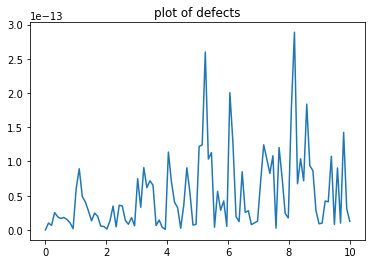

In [34]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

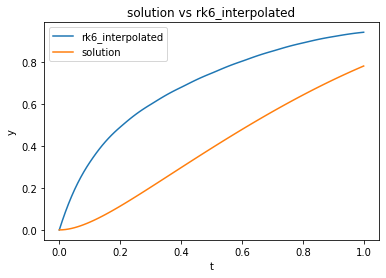

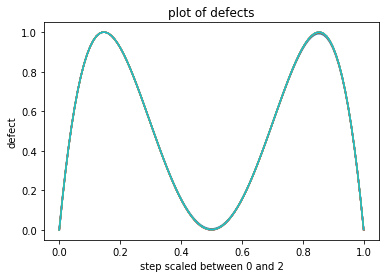

global defects [0.0, 4.886935042316156, 7.08246126363663, 7.326978035577591, 6.266978982779504, 4.45597349261792, 2.3555440302868638, 0.3365379461333563, 1.3196075641736147, 2.41940871526492, 2.2069149869610563, 2.4575609503557594, 4.581628433319761, 4.8761825528452585, 3.958969284298229, 2.3559877084526035, 0.5030212304091594, 1.2527035956799475, 2.6507320738758624, 3.515471689872233, 2.5613791626479117, 1.6826559959017668, 3.5741048940885833, 3.7857974659262448, 2.899354556874073, 1.4070401317095322, 0.286264163929113, 1.8609636902909692, 3.080536401081922, 3.78920103481879, 2.288387725735526, 1.4634597275003907, 3.0727759828660526, 3.167427999525185, 2.287070266818917, 0.8854215219288254, 0.6673435517413637, 2.0820894934693057, 3.148103999316182, 3.730372568688062, 1.8402179233684417, 1.399326179191306, 2.721103402491733, 2.702157722894262, 1.8353017872298807, 0.5317918179994006, 0.8758908752049233, 2.131153872166348, 3.050305247342056, 3.5194649910768168, 1.3859768312137177, 1.3451

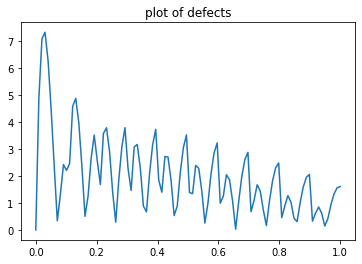

In [35]:
t_span_4 = [0, 1]
y0_4 = [0]

def model4(t, y):
    # return [100 * (sin(t) - y)]
    return [10 * (sin(t) - y)]

def solution4(t):
    # return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

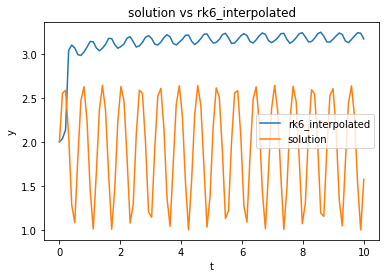

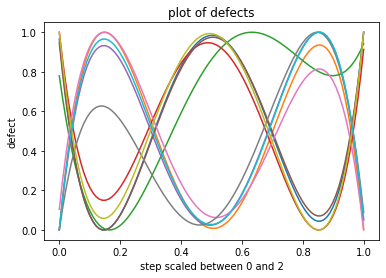

global defects [0.0, 2.5104674495402595, 31.430447258029325, 15.863055933526546, 9.66510368007465, 6.10441932689019, 8.405979342699172, 2.874412837699653, 0.40206097938426777, 2.0599790379287484, 4.858038103028205, 2.856716442355483, 12.816879331200631, 8.721837992966524, 0.7230134675079692, 7.584716260231222, 8.193613363519622, 1.4181091232486733, 5.2570522879994614, 1.9804112605875366, 0.29246329816580474, 6.088495102671422, 11.992089215403531, 5.431754872331693, 10.560702477628677, 8.98560696045474, 2.167587636036434, 1.9117589458195967, 4.0118090119656795, 4.253135597046558, 5.003439895513869, 10.18187893260922, 5.411536391823545, 4.11353413026781, 11.015672378386622, 8.908537071158745, 3.5286340187900125, 6.029798692981815, 1.848589043716664, 0.08071083689225811, 4.403260205249926, 10.034812524177593, 1.3601350109628196, 12.905457865602251, 8.4301793140849, 0.3407385293817497, 4.392975320934133, 5.909108990963448, 2.3433012434780385, 4.4434949907298105, 5.1899708335339945, 1.75085

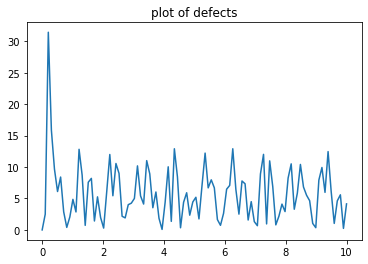

In [36]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

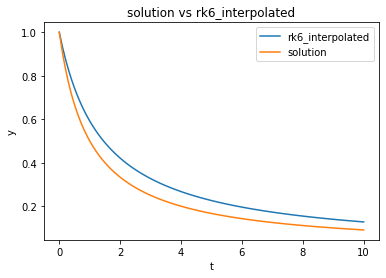

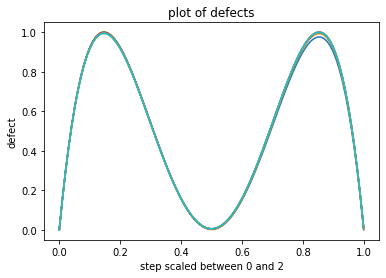

global defects [0.0, 0.2549654520232051, 0.30112667398787163, 0.2567965604183611, 0.18227739490491945, 0.10713603319556808, 0.04453722140533439, 0.0010515408135460813, 0.02965548729523282, 0.04348206692348239, 0.03767167055188195, 0.015719203707010854, 0.033061602050401595, 0.030705611516084197, 0.019077605299918005, 0.00462237520554401, 0.008886646156774286, 0.0194580236766779, 0.026276008472366524, 0.029286202293804506, 0.023610622184195462, 0.005223794898263925, 0.001559306177693745, 0.0014767036974932535, 0.0021717701656258914, 0.007154063688734891, 0.012028413595268392, 0.015934959289390246, 0.018438994957805724, 0.019412967450533364, 0.01543389532266904, 0.007275810429087773, 0.004131325606814208, 0.004069536976696313, 0.00567994090170551, 0.007960915140653918, 0.010231081111281161, 0.012058774163277289, 0.013205883320029636, 0.013583121699850563, 0.01077590407877159, 0.006568225019065496, 0.004929239005942998, 0.004902997776207882, 0.005770094169777425, 0.00700401508064976, 0.00

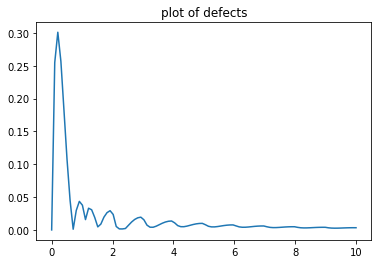

In [37]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

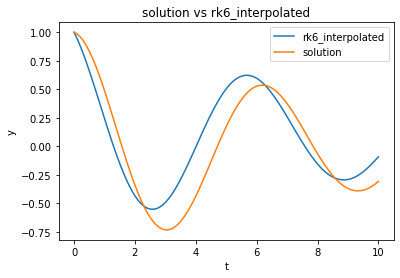

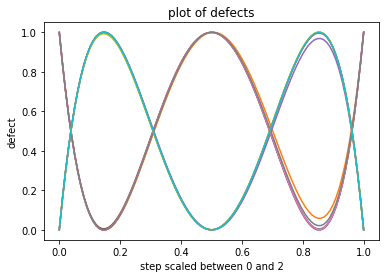

global defects [0.0, 0.4603825971361089, 0.6346743156216769, 0.6224048445210044, 0.5068222076082901, 0.35246634282201905, 0.20443295734933598, 0.08915947762200982, 0.01651776476983824, 0.017038901003880724, 0.016478331928415413, 0.009430821414256108, 0.07587605151265508, 0.15343403348130014, 0.20538937859062623, 0.21650497781778966, 0.1882168880946714, 0.13352919418618747, 0.07191374094029523, 0.02449647478580863, 0.09378042152571042, 0.4207801152648414, 0.5952979874710653, 0.6380613097444993, 0.5806749278787027, 0.4597523795548755, 0.3118332743675545, 0.16925166013294102, 0.05706856547513417, 0.008870314198076934, 0.1132346674340974, 0.4062522161068255, 0.5034133604834425, 0.4729531996852827, 0.37275964447506904, 0.24825316782861528, 0.13150757372006933, 0.041508521221299444, 0.014591039223274649, 0.03939003258014334, 0.0024975476579024436, 0.019747330694994902, 0.020061917069941537, 0.0752503191046896, 0.11742517376222583, 0.133735408098701, 0.12359978450320619, 0.09513541463173203, 

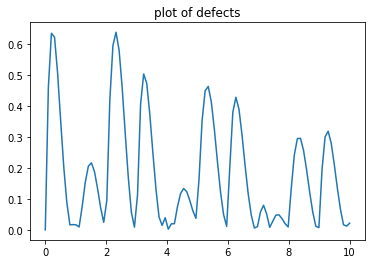

In [38]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

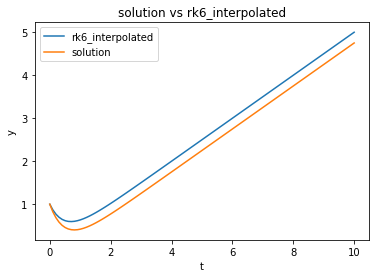

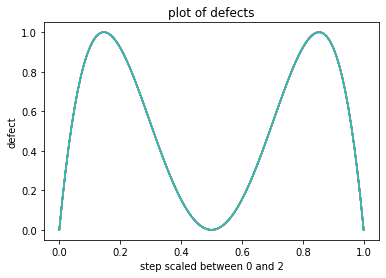

In [19]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [ ]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)